In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# Classification

### Why don't we use linear regression? 

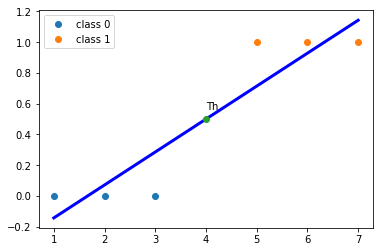

In [2]:
x = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])
plt.plot(x[:3],y[:3],'o')
plt.plot(x[3:],y[3:],'o')
plt.legend(['class 0','class 1'])
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(x.reshape(-1,1), reg.predict(x.reshape(-1,1)), color='blue',
         linewidth=3)
plt.plot(4,0.5,'o')
plt.text(4,0.56,'Th')

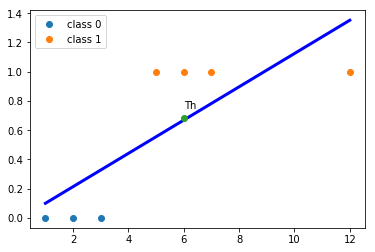

In [3]:
x = np.array([1, 2, 3, 5, 6, 7, 12])
y = np.array([0, 0, 0, 1, 1, 1, 1])
plt.plot(x[:3],y[:3],'o')
plt.plot(x[3:],y[3:],'o')
plt.legend(['class 0','class 1'])
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(x.reshape(-1,1), reg.predict(x.reshape(-1,1)), color='blue',
         linewidth=3)
plt.plot(6,0.68,'o')
plt.text(6,0.75,'Th')


So, there is two main problems:
1. Linear regression output is not limited by 0 & 1 (Model Representation)
2. Linear regression cost function is based on residual differnce which is not suitable for sigmoid function (non convex cost function )
3. Threshold problem (later) 

### Model Representation

Output limited by  0 & 1 i.e $ 0 \leqslant f(x) \leqslant 1 $

We need a function to limit the output of the linear regression to be between 0 & 1

Sigmoid function: 

$$ \sigma(z) = \dfrac{1}{1+ e^{-z}} $$

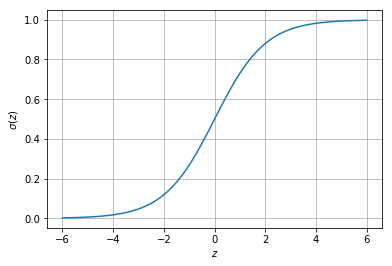

In [4]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

z = np.linspace(-6,6,100)
plt.plot(z, sigmoid(z))
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')
plt.grid()

Where $ z = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n $ (linear regression function)

sigmoid has a desired probabilistic properties (binary classification only)

## Cost function

using the sigmoid non linear function with the residual squared differance will lead to a $\textbf{non convex function}$.

so we need another cost function

$$ log\ loss = -\frac{1}{n} \sum_{i=1}^n y^{(i)} \ln f(x^{(i)}) + \left(1 - y^{(i)}\right) \ln \left(1 - f(x^{(i)})\right) $$